In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding='iso-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...,NaN,NaN,NaN
4806,spam,PRIVATE! Your 2004 Account Statement for 07849...,NaN,NaN,NaN
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
3486,ham,Change windows logoff sound..,NaN,NaN,NaN
2302,ham,We can make a baby in yo tho,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
26,ham,Lol your always so convincing.
336,ham,Cool. So how come you havent been wined and di...
2346,ham,Its posible dnt live in &lt;#&gt; century cm ...
3636,ham,You know what hook up means right?
2659,ham,Ok...


In [8]:
#column renaming
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
2898,0,"Aight, I should be there by 8 at the latest, p..."
2367,0,V nice! Off 2 sheffield tom 2 air my opinions ...
498,0,"Kate jackson rec center before 7ish, right?"
1654,0,"Wishing you and your family Merry \X\"" mas and..."
1769,0,Ha... Both of us doing e same thing. But i got...


In [12]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking for duplicate values
df.duplicated().sum()

403

In [14]:
# removing duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

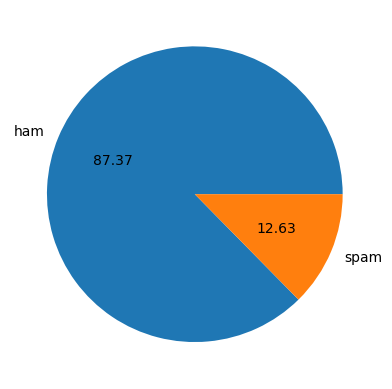

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/vikas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['total_characters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['total_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,total_characters,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['total_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# describe for ham  messages
df[df['target']==0][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# describe for spam
df[df['target']==1][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns 

<Axes: xlabel='total_characters', ylabel='Count'>

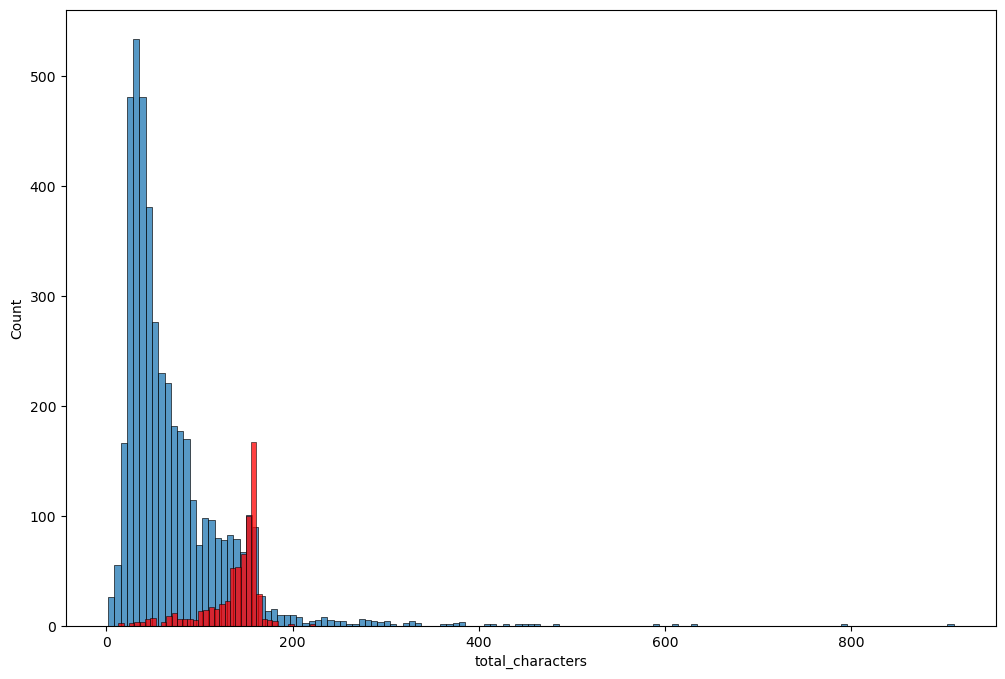

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['total_characters'])
sns.histplot(df[df['target']==1]['total_characters'],color='red')

<Axes: xlabel='total_words', ylabel='Count'>

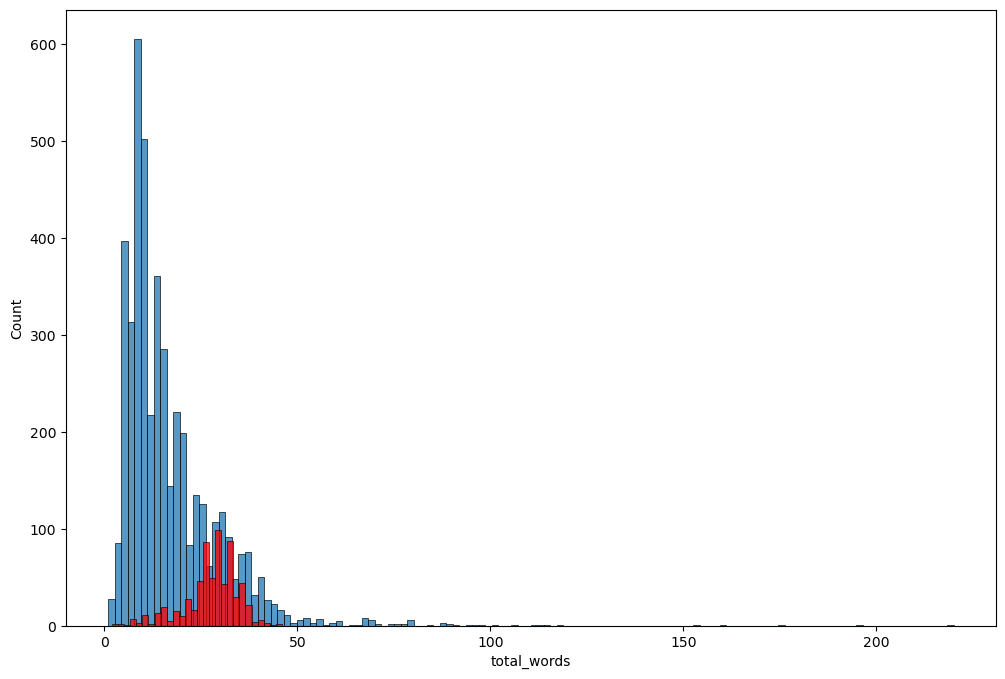

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['total_words'])
sns.histplot(df[df['target']==1]['total_words'],color='red')

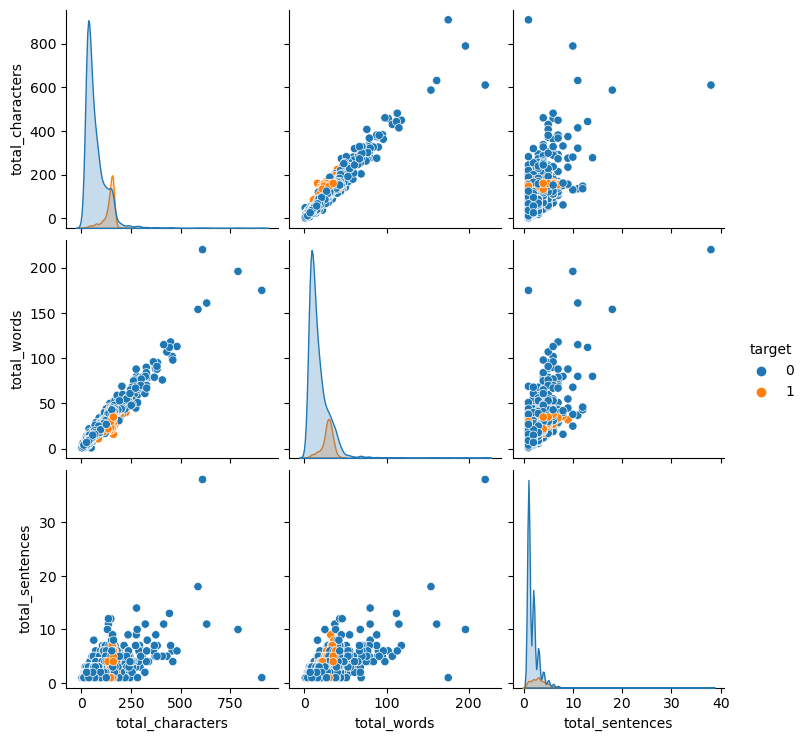

In [32]:
#finding the relationships between columns
sns.pairplot(df,hue='target')

<Axes: >

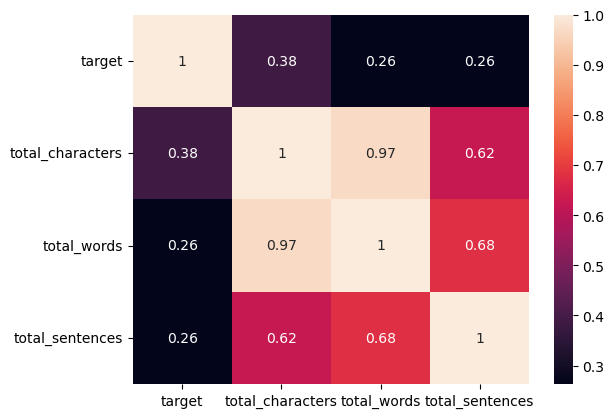

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
# data preprocessing
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

def convert_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

[nltk_data] Downloading package stopwords to /home/vikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
convert_text("hi there are you walking i am Vikas?")

'hi walk vika'

In [36]:
convert_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['transformed_text'] = df['text'].apply(convert_text)

In [38]:
df.head()

,target,text,total_characters,total_words,total_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500)

In [41]:
spam_cloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

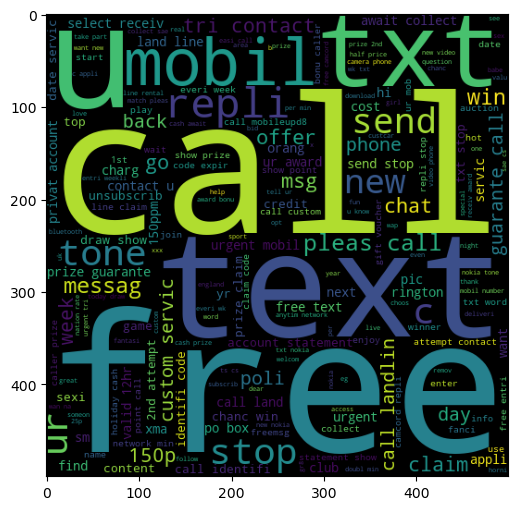

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_cloud)

In [43]:
ham_cloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

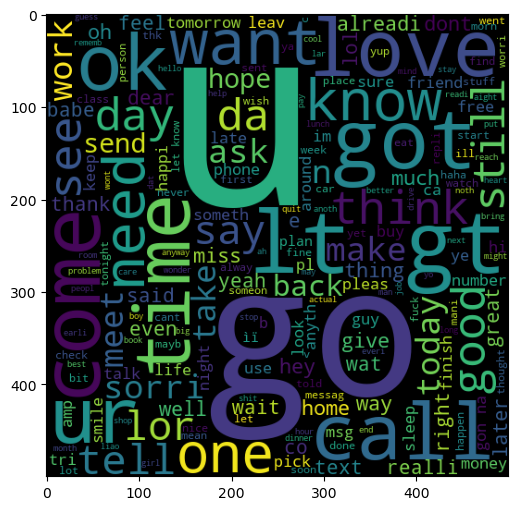

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_cloud)

In [45]:
df.head()

,target,text,total_characters,total_words,total_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
spam_words = []
for message in df[df['target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_words.append(word)

In [47]:
len(spam_words)

9939

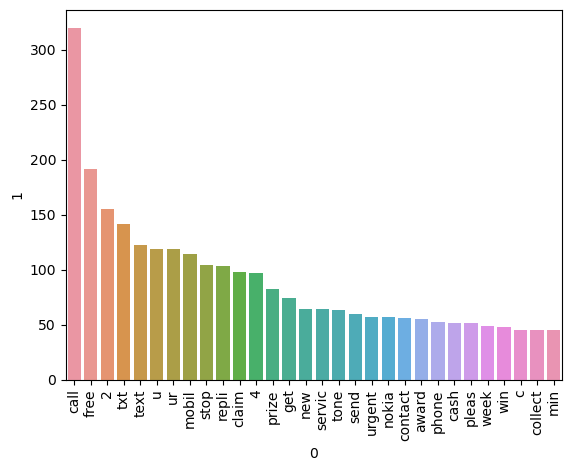

In [48]:
from collections import Counter
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(spam_words).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_words = []
for message in df[df['target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_words.append(word)

In [50]:
len(ham_words)

35404

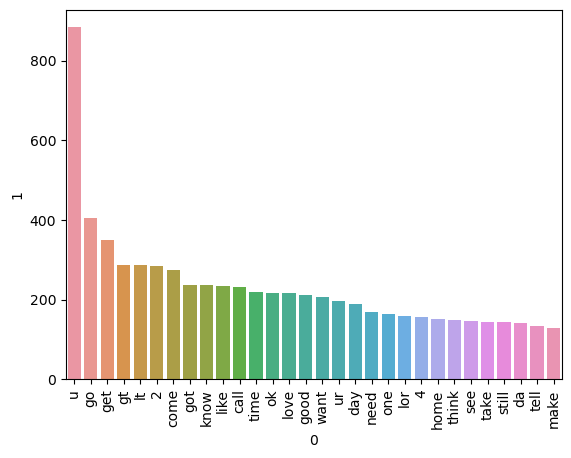

In [51]:
sns.barplot(x=0,y=1,data=pd.DataFrame(Counter(ham_words).most_common(30)))
plt.xticks(rotation='vertical')
plt.show()

In [106]:
#Model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [107]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [108]:
X.shape

(5169, 3000)

In [109]:
y = df['target'].values

In [110]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [114]:
g = GaussianNB()
m = MultinomialNB()
b = BernoulliNB()

In [115]:
g.fit(X_train,y_train)
y_pred_g = g.predict(X_test)
print(accuracy_score(y_test,y_pred_g))
print(confusion_matrix(y_test,y_pred_g))
print(precision_score(y_test,y_pred_g))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [116]:
m.fit(X_train,y_train)
y_pred_m = m.predict(X_test)
print(accuracy_score(y_test,y_pred_m))
print(confusion_matrix(y_test,y_pred_m))
print(precision_score(y_test,y_pred_m))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [117]:
b.fit(X_train,y_train)
y_pred_b = b.predict(X_test)
print(accuracy_score(y_test,y_pred_b))
print(confusion_matrix(y_test,y_pred_b))
print(precision_score(y_test,y_pred_b))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [119]:
## using tfidf and multinomial Naive bayes Model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(m,open('model.pkl','wb'))